# Imports 

In [1]:
from pdb import run
from unittest import case
import emcee
import corner
import pickle
from tqdm import tqdm
import numpy as np
from qutip import *
from multiprocess import Pool
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution, basinhopping
from IPython.display import display, Math
from scipy.stats import chi2
from protocolsClass import Hamiltonian_Fitter,State


# Measurement Data

In [2]:
ground_meas = np.array([7512786.3, 6847127.7, 6180056.7, 5510661.7, 4837199., 4156107.7, 3459061.2, 2730533.1, 1787541.6]) * 1e-3 # [kHz]
manu_ramsey_meas = np.array([-134296, -133678, -132898, -131896, -130532, -128697, -125952, -124533, -88889]) * 1e-3 # [kHz]
full_meas = np.concatenate((ground_meas,manu_ramsey_meas))

d_ground_meas = np.array([1,1,1,1,1,1,1,1,1]) * 1e-3 # [kHz]
d_manu_ramsey_meas = np.array([1,1,1,1,1,1,1,1,1]) * 20e-3 # [kHz]
d_full_meas = np.concatenate((d_ground_meas,d_manu_ramsey_meas))

A_perp_meas = 105 # [kHz] | Measured through the Raman Rabi experiment
A_simu = np.array([[-436.6,    0.,   -41.3],
                    [  -0.,  -448.4,    0. ],
                    [ -88.5,    0.,   129.8]])


fitter_ground = Hamiltonian_Fitter(ground_meas,d_ground_meas,State.Ground)
fitter_excited = Hamiltonian_Fitter(ground_meas + manu_ramsey_meas,d_ground_meas,State.Excited)
fitter_full = Hamiltonian_Fitter(full_meas,d_full_meas,State.Full, meas_Aperp = A_perp_meas,simu_A= A_simu)

# Fitted Values and Guesses

In [3]:
guess_exicted = [446.3, -237.1,  149.5,   10.65, 0.6]
guess_exicted = [ 4.43614051e+02 ,-2.36794019e+02, 1.49286163e+02, 1.59948409e+01,1.12819327e-01] #1RUN 
guess_exicted = [ 4.43614051e+02 ,-2.36794019e+02, 1.49286163e+02, 1.59948409e+01,1.12819327e-01] #1RUN 
guess_exicted = [ 4.43613977e+02, -2.36793936e+02, 1.49286932e+02, 1.59926691e+01, 1.11464109e-01]

guess_ground = [4.60832e+02, -2.37368e+02,  1.25900e+00, -4.00000e-03, 1.53400e+00] 
guess_ground = [ 456.14443873 ,-237.12801178 , 148.54641495 ,   7.46758762 , 374.08954251] # RUN1
guess_ground  =  [ 456.0840477 , -237.22287091 , 149.38269055  ,  8.26172301 , 374.01006077] #RUN2
guess_ground = [ 456.08283005, -237.22462143,  149.39880504,    8.29825619,  374.0529795 ] #RUN3


guess_full = np.array([4.498e+02,  1.299e+02, -2.370e+02, -1.190e+01, -1.492e+02,  1.500e+00, -8.000e-01,  1.000e-01])
best_x =  [ 4.49821745e+02,  1.29897714e+02 ,-2.37052323e+02, -1.19458723e+01, -1.49320580e+02,  1.57442624e+00, -8.21616775e-01 , 7.88331359e-02]
median_x =  [ 4.49821749e+02,  1.29897911e+02, -2.37052291e+02, -1.19454405e+01, -1.49320418e+02,  1.57449384e+00, -8.21746234e-01,  7.89184735e-02]

# Ground

In [ ]:
fitter_ground.run_MCMC(guess_ground)

# excited

In [ ]:
fitter_excited.run_MCMC(guess_exicted)

# Full

In [ ]:
fitter_full.run_MCMC(best_x)

 32%|███▏      | 3244/10000 [05:54<12:19,  9.13it/s]

In [ ]:
fitter_full.plot_levels_and_residuals_separated(median_x)

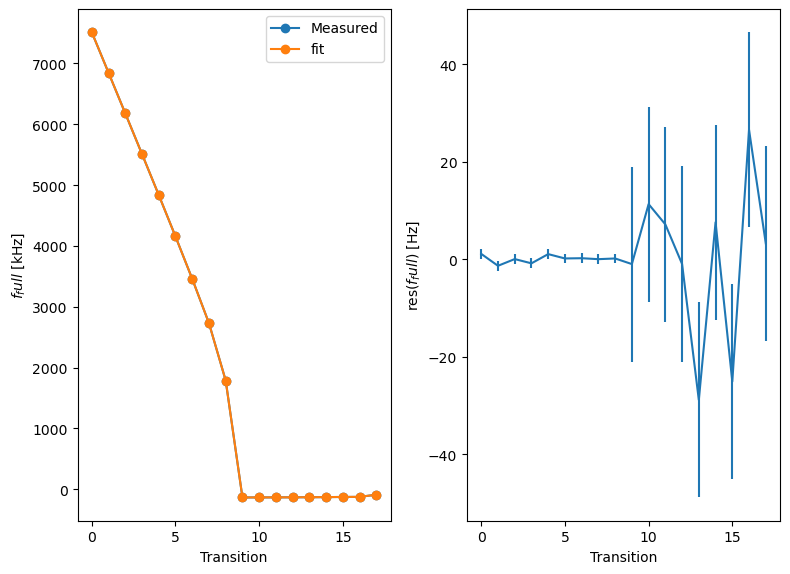

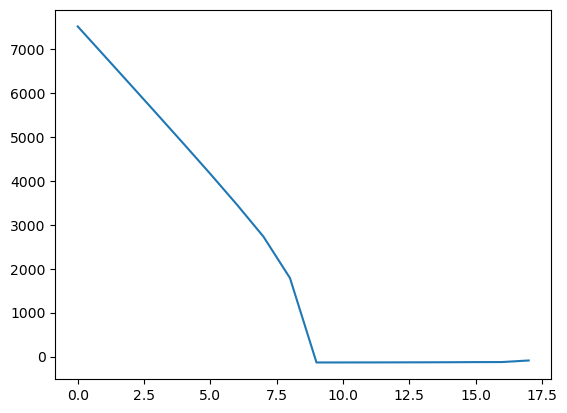

In [11]:
fitter_full.plot_levels_and_residuals_separated(fitter_full.median_x,'')
plt.plot(np.concatenate((ground_meas,manu_ramsey_meas)))